In [31]:
rng_seed = 60

In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
import pandas as pd
#below line allows matplotlib plots to appear in cell output
%matplotlib inline

# **Question 1**: Image Compression with 2D Fourier Transforms

In this question, you'll explore how 2D Fourier transforms can be used to analyze and compress digital images. The Fourier transform decomposes an image into its frequency components, allowing us to understand which spatial frequencies contribute most to the image content.

### Background: 2D Fourier Transforms for Images

A color image can be represented as a 3D array with dimensions `(height, width, 3)`, where the last dimension corresponds to the three color channels: Red, Green, and Blue (RGB).

The **2D Fourier Transform** converts spatial domain information (pixel values at different positions) into frequency domain information (how much each spatial frequency contributes to the image). 

**Key Concepts:**
- **Low frequencies** correspond to slowly varying features (smooth regions, overall color)
- **High frequencies** correspond to rapidly varying features (edges, fine details, noise)
- The **2D real FFT** (`numpy.fft.rfft2`) is optimized for real-valued input (like image pixel values) and returns complex-valued frequency coefficients

### Image Compression Principle

By transforming an image to the frequency domain, we can:
1. Identify which frequencies contain the most information
2. Discard high-frequency components (fine details) to reduce data size
3. Reconstruct an approximate image from the reduced frequency data

This is the principle behind JPEG compression and many other image compression algorithms!

### Helper Functions

First, we'll provide helper functions to load and work with our sample images:

In [6]:
def load_image(filename):
    return np.load(filename)

def display_image(img, title="Image"):
    plt.figure(figsize=(6, 6))
    plt.imshow(np.clip(img, 0, 1))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load sample images for testing
sunset_img = load_image('sunset.npy')
forest_img = load_image('forest.npy')
ocean_img = load_image('ocean.npy')

print(f"Loaded images:")
print(f"  Sunset: {sunset_img.shape}")
print(f"  Forest: {forest_img.shape}")
print(f"  Ocean: {ocean_img.shape}")

Loaded images:
  Sunset: (256, 256, 3)
  Forest: (256, 256, 3)
  Ocean: (256, 256, 3)


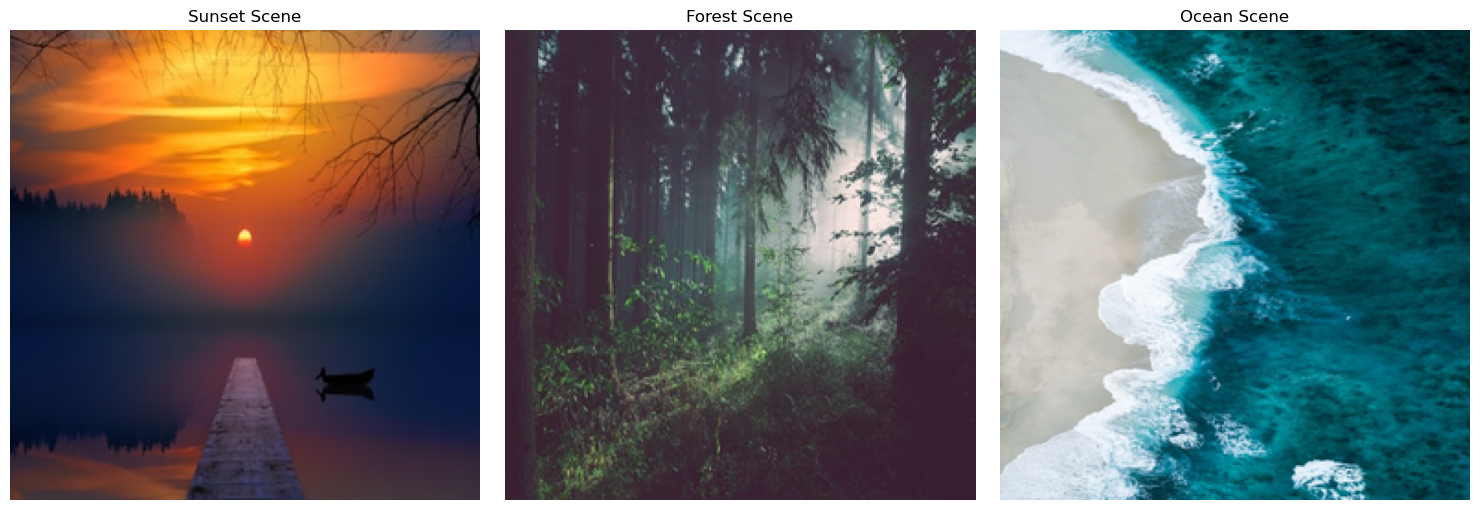

In [5]:
# Display the sample images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(np.clip(sunset_img, 0, 1))
axes[0].set_title('Sunset Scene')
axes[0].axis('off')
axes[1].imshow(np.clip(forest_img, 0, 1))
axes[1].set_title('Forest Scene')
axes[1].axis('off')
axes[2].imshow(np.clip(ocean_img, 0, 1))
axes[2].set_title('Ocean Scene')
axes[2].axis('off')
plt.tight_layout()
plt.show()

## **Part A**: Computing the 2D Fourier Transform

Now you'll implement a function that computes the 2D Fourier transform of a color image.

### Your Task

Write a function `image_to_fourier(img)` that:
1. Takes a color image as a 3D numpy array with shape `(height, width, 3)`
2. Computes the 2D real Fourier transform (`numpy.fft.rfft2`) separately for each color channel
3. Returns a tuple of three arrays, one for each color channel's Fourier transform

### Mathematical Background

For a 2D array (like one color channel), the 2D Fourier transform is:

$$F(k_x, k_y) = \sum_{x=0}^{N_x-1} \sum_{y=0}^{N_y-1} f(x,y) \cdot e^{-2\pi i (k_x x / N_x + k_y y / N_y)}$$

where:
- $f(x,y)$ is the pixel value at position $(x,y)$
- $F(k_x, k_y)$ is the Fourier coefficient for spatial frequency $(k_x, k_y)$
- $N_x, N_y$ are the image dimensions

The function `numpy.fft.rfft2` efficiently computes this transform, exploiting the fact that our input is real-valued.

### Requirements

- Input validation: check that `img` is a 3D array with shape `(height, width, 3)`
- Use `numpy.fft.rfft2()` on each color channel separately
- The red channel is `img[:, :, 0]`, green is `img[:, :, 1]`, blue is `img[:, :, 2]`
- Return a tuple: `(fourier_red, fourier_green, fourier_blue)`
- Each returned array will be complex-valued with shape `(height, width//2 + 1)` due to rfft2's optimization

**Parameters:**
- `img`: numpy array of shape `(height, width, 3)`, the input color image

**Returns:**
- `fourier_transforms`: tuple of 3 numpy arrays, each containing the 2D Fourier transform of one color channel

In [7]:
def image_to_fourier(img):
    # BEGIN SOLUTION NO PROMPT
    """
    Compute the 2D Fourier transform of a color image.
    
    Parameters:
    -----------
    img : numpy.ndarray
        Color image array of shape (height, width, 3)
    
    Returns:
    --------
    fourier_transforms : tuple of 3 numpy.ndarray
        (fourier_red, fourier_green, fourier_blue), each with shape (height, width//2 + 1)
    """
    # Input validation
    if img.ndim != 3 or img.shape[2] != 3:
        raise ValueError("Input must be a 3D array with shape (height, width, 3)")
    
    # Extract color channels
    red_channel = img[:, :, 0]
    green_channel = img[:, :, 1]
    blue_channel = img[:, :, 2]
    
    # Compute 2D FFT for each channel
    fourier_red = np.fft.rfft2(red_channel)
    fourier_green = np.fft.rfft2(green_channel)
    fourier_blue = np.fft.rfft2(blue_channel)
    
    return (fourier_red, fourier_green, fourier_blue)
    # END SOLUTION
    """ # BEGIN PROMPT
    
    return (fourier_red, fourier_green, fourier_blue)
    """; # END PROMPT

In [8]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that function returns a tuple of three arrays
result = image_to_fourier(sunset_img)
test_result = isinstance(result, tuple) and len(result) == 3
test_result

True

In [9]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that each array in the tuple is complex-valued
fr, fg, fb = image_to_fourier(forest_img)
test_result = np.iscomplexobj(fr) and np.iscomplexobj(fg) and np.iscomplexobj(fb)
bool(test_result)

True

In [10]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that output shapes are correct for rfft2
fr, fg, fb = image_to_fourier(ocean_img)
h, w = ocean_img.shape[0], ocean_img.shape[1]
expected_shape = (h, w // 2 + 1)
test_result = fr.shape == expected_shape and fg.shape == expected_shape and fb.shape == expected_shape
bool(test_result)

True

In [11]:
""" # BEGIN TEST CONFIG
points: 1
hidden: true
""" # END TEST CONFIG
# Test that DC component (zero frequency) equals the mean of the image
fr, fg, fb = image_to_fourier(sunset_img)
# DC component is at [0, 0] and should equal mean * number of pixels
expected_dc_red = np.mean(sunset_img[:, :, 0]) * sunset_img.shape[0] * sunset_img.shape[1]
test_result = np.abs(fr[0, 0] - expected_dc_red) < 1e-6
bool(test_result)

True

## **Part B**: Inverse Fourier Transform (Image Reconstruction)

Now you'll implement the inverse operation: converting Fourier transforms back to an image.

### Your Task

Write a function `fourier_to_image(fourier_transforms, original_shape)` that:
1. Takes a tuple of three Fourier transforms (one per color channel)
2. Takes the original image shape `(height, width)`
3. Applies the inverse 2D real FFT (`numpy.fft.irfft2`) to each channel
4. Reconstructs and returns the color image as a 3D array

### Mathematical Background

The **inverse Fourier transform** converts frequency domain data back to spatial domain:

$$f(x,y) = \frac{1}{N_x N_y} \sum_{k_x=0}^{N_x-1} \sum_{k_y=0}^{N_y-1} F(k_x, k_y) \cdot e^{2\pi i (k_x x / N_x + k_y y / N_y)}$$

The function `numpy.fft.irfft2` efficiently computes this inverse transform. When paired with `rfft2`, we should get back exactly the original image (up to numerical precision).

### Requirements

- Input `fourier_transforms` should be a tuple of 3 complex arrays (from Part A)
- Input `original_shape` should be a tuple `(height, width)` specifying the original image dimensions
- Apply `numpy.fft.irfft2(fourier_channel, s=original_shape)` to each Fourier transform
  - The `s` parameter is crucial! It tells `irfft2` the original dimensions
- Stack the three reconstructed channels into a 3D array with shape `(height, width, 3)`
- Return the reconstructed image array

**Note:** The reconstructed image should be virtually identical to the original (differences only due to floating-point precision).

**Parameters:**
- `fourier_transforms`: tuple of 3 numpy arrays, the Fourier transforms from Part A
- `original_shape`: tuple `(height, width)`, the dimensions of the original image

**Returns:**
- `img_reconstructed`: numpy array of shape `(height, width, 3)`, the reconstructed color image

In [12]:
def fourier_to_image(fourier_transforms, original_shape):
    # BEGIN SOLUTION NO PROMPT
    """
    Reconstruct a color image from its Fourier transforms.
    
    Parameters:
    -----------
    fourier_transforms : tuple of 3 numpy.ndarray
        (fourier_red, fourier_green, fourier_blue) from image_to_fourier
    original_shape : tuple
        (height, width) of the original image
    
    Returns:
    --------
    img_reconstructed : numpy.ndarray
        Reconstructed color image of shape (height, width, 3)
    """
    # Unpack the Fourier transforms
    fourier_red, fourier_green, fourier_blue = fourier_transforms
    
    # Apply inverse FFT to each channel
    red_channel = np.fft.irfft2(fourier_red, s=original_shape)
    green_channel = np.fft.irfft2(fourier_green, s=original_shape)
    blue_channel = np.fft.irfft2(fourier_blue, s=original_shape)
    
    # Stack channels to create 3D image array
    img_reconstructed = np.stack([red_channel, green_channel, blue_channel], axis=2)
    
    return img_reconstructed
    # END SOLUTION
    """ # BEGIN PROMPT
    
    return img_reconstructed
    """; # END PROMPT

In [13]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that function returns a 3D array
fourier = image_to_fourier(sunset_img)
reconstructed = fourier_to_image(fourier, sunset_img.shape[:2])
test_result = isinstance(reconstructed, np.ndarray) and reconstructed.ndim == 3
bool(test_result)

True

In [14]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that reconstructed image has correct shape
fourier = image_to_fourier(forest_img)
reconstructed = fourier_to_image(fourier, forest_img.shape[:2])
test_result = reconstructed.shape == forest_img.shape
bool(test_result)

True

In [19]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that reconstruction is very close to original (round-trip accuracy)
fourier = image_to_fourier(ocean_img)
reconstructed = fourier_to_image(fourier, ocean_img.shape[:2])
max_error = np.max(np.abs(reconstructed - ocean_img))
test_result = max_error < 1e-5
bool(test_result)

True

In [20]:
""" # BEGIN TEST CONFIG
points: 1
hidden: true
""" # END TEST CONFIG
# Test with a different image to ensure generalization
test_img = np.random.rand(128, 128, 3)
fourier = image_to_fourier(test_img)
reconstructed = fourier_to_image(fourier, test_img.shape[:2])
test_result = np.allclose(reconstructed, test_img, rtol=1e-10, atol=1e-10)
bool(test_result)

True

### Example: Round-Trip Transform and Reconstruction

Let's demonstrate the full pipeline: transform an image to Fourier space and reconstruct it back:

In [22]:
# Select an image to test
test_image = sunset_img

# Transform to Fourier space
fourier_transforms = image_to_fourier(test_image)
print(f"Original image shape: {test_image.shape}")
print(f"Fourier transform shapes: {[f.shape for f in fourier_transforms]}")

# Reconstruct from Fourier space
reconstructed_image = fourier_to_image(fourier_transforms, test_image.shape[:2])
print(f"Reconstructed image shape: {reconstructed_image.shape}")

# Calculate reconstruction error
error = np.max(np.abs(reconstructed_image - test_image))
print(f"\nMaximum reconstruction error: {error:.2e}")

Original image shape: (256, 256, 3)
Fourier transform shapes: [(256, 129), (256, 129), (256, 129)]
Reconstructed image shape: (256, 256, 3)

Maximum reconstruction error: 2.68e-07


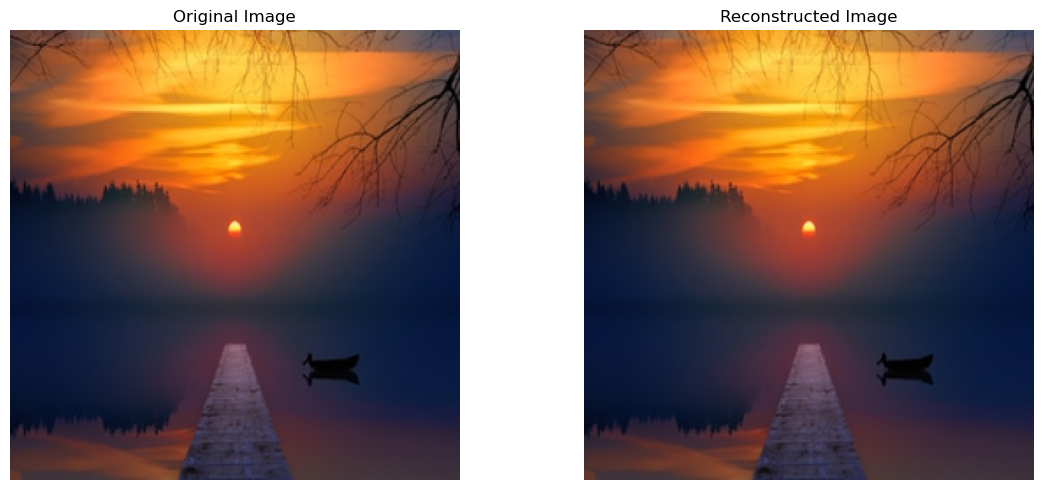

The images should be visually identical!


In [23]:
# Visualize original vs reconstructed
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(np.clip(test_image, 0, 1))
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(np.clip(reconstructed_image, 0, 1))
axes[1].set_title('Reconstructed Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

print("The images should be visually identical!")

# **Question 2**: Frequency Filtering of 1D Time Series

In this question, you'll implement a frequency filter for 1D time series data using Fourier transforms. Frequency filtering is a fundamental technique in signal processing that allows us to remove unwanted frequency components from signals, such as noise or interference.

### Background: Frequency Domain Filtering

A time series signal $x(t)$ can be decomposed into its frequency components using the **Fourier Transform**. In the frequency domain, we can:

1. **Identify** which frequencies are present in the signal
2. **Modify** the frequency content by zeroing out unwanted frequencies
3. **Reconstruct** the filtered signal using the inverse Fourier transform

This process is called **frequency filtering** or **spectral filtering**.

### Types of Frequency Filters

- **Low-pass filter**: Keeps frequencies below a cutoff frequency (removes high frequencies)
- **High-pass filter**: Keeps frequencies above a cutoff frequency (removes low frequencies)  
- **Band-pass filter**: Keeps frequencies within a specific range (removes frequencies outside the band)
- **Band-stop filter**: Removes frequencies within a specific range (keeps frequencies outside the band)

In this question, you'll implement a **band-pass filter** that keeps only frequencies between a minimum and maximum frequency.

### Mathematical Background

For a discrete signal $x[n]$ with $N$ samples, the process is:

1. **Forward FFT**: $X[k] = \text{FFT}(x[n])$ converts time domain to frequency domain
2. **Filtering**: Set $X[k] = 0$ for frequencies outside the desired range
3. **Inverse FFT**: $x_{\text{filtered}}[n] = \text{IFFT}(X[k])$ converts back to time domain

The frequency corresponding to each FFT bin $k$ is:
$$f[k] = \frac{k \cdot f_s}{N}$$

where $f_s$ is the sampling frequency and $k$ ranges from $0$ to $N-1$.

### Applications

Frequency filtering is used in:
- **Audio processing**: Removing noise, equalizing music
- **Biomedical signals**: Filtering ECG, EEG data
- **Communications**: Removing interference
- **Image processing**: Smoothing, edge detection (2D filtering)

## Your Task

Write a function `frequency_filter(signal, min_freq, max_freq, sample_rate=1.0)` that:
1. Takes a 1D real-valued time series signal
2. Applies a band-pass filter to keep only frequencies between `min_freq` and `max_freq`
3. Returns the filtered signal in the time domain

### Requirements

- **Input validation**: Check that `signal` is a 1D numpy array
- **Forward FFT**: Use `numpy.fft.fft()` to transform the signal to frequency domain
- **Frequency calculation**: Compute the frequency array using `numpy.fft.fftfreq()`
- **Filtering**: 
  - Set FFT coefficients to zero for frequencies outside the range `[min_freq, max_freq]`
  - Handle both positive and negative frequencies correctly (FFT output is complex and symmetric for real input)
- **Inverse FFT**: Use `numpy.fft.ifft()` and take the real part to get the filtered signal
- **Return**: The filtered signal as a real-valued numpy array

### Mathematical Details

For a signal with `N` samples and sampling rate `sample_rate`:
- Frequency array: `freqs = np.fft.fftfreq(N, 1/sample_rate)`
- Keep frequencies where: `min_freq <= |freq| <= max_freq`
- Zero out all other frequency components
- The DC component (frequency = 0) should be kept if `min_freq <= 0`

**Parameters:**
- `signal`: numpy array, 1D real-valued time series
- `min_freq`: float, minimum frequency to keep (in Hz)
- `max_freq`: float, maximum frequency to keep (in Hz)  
- `sample_rate`: float, sampling rate in Hz (default: 1.0)

**Returns:**
- `filtered_signal`: numpy array, filtered time series signal

In [24]:
def frequency_filter(signal, min_freq, max_freq, sample_rate=1.0):
    # BEGIN SOLUTION NO PROMPT
    """
    Apply a band-pass frequency filter to a 1D time series signal.
    
    Parameters:
    -----------
    signal : numpy.ndarray
        1D real-valued time series
    min_freq : float
        Minimum frequency to keep (Hz)
    max_freq : float
        Maximum frequency to keep (Hz)
    sample_rate : float, optional
        Sampling rate in Hz (default: 1.0)
    
    Returns:
    --------
    filtered_signal : numpy.ndarray
        Filtered time series signal
    """
    # Input validation
    signal = np.asarray(signal)
    if signal.ndim != 1:
        raise ValueError("Signal must be a 1D array")
    
    N = len(signal)
    
    # Forward FFT
    signal_fft = np.fft.fft(signal)
    
    # Compute frequency array
    freqs = np.fft.fftfreq(N, 1/sample_rate)
    
    # Create filter mask - keep frequencies in the range [min_freq, max_freq]
    # Use absolute value to handle both positive and negative frequencies
    filter_mask = (np.abs(freqs) >= min_freq) & (np.abs(freqs) <= max_freq)
    
    # Apply filter by zeroing out unwanted frequencies
    filtered_fft = signal_fft.copy()
    filtered_fft[~filter_mask] = 0
    
    # Inverse FFT to get filtered signal
    filtered_signal = np.fft.ifft(filtered_fft)
    
    # Take real part (should be real for real input, but numerical precision)
    filtered_signal = np.real(filtered_signal)
    
    return filtered_signal
    # END SOLUTION
    """ # BEGIN PROMPT
    
    return filtered_signal
    """; # END PROMPT

In [25]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that function returns a numpy array of same length
test_signal = np.sin(2 * np.pi * 0.5 * np.linspace(0, 1, 100))
filtered = frequency_filter(test_signal, 0.1, 1.0)
test_result = isinstance(filtered, np.ndarray) and len(filtered) == len(test_signal)
bool(test_result)

True

In [26]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that filtered signal is real-valued
test_signal = np.random.randn(128)
filtered = frequency_filter(test_signal, 0.0, 0.5, sample_rate=1.0)
test_result = np.isrealobj(filtered)
bool(test_result)

True

In [27]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that low-frequency sine wave passes through low-pass filter
t = np.linspace(0, 4, 1000)
sample_rate = 250
low_freq_signal = np.sin(2 * np.pi * 5 * t)  # 5 Hz sine wave
filtered = frequency_filter(low_freq_signal, 0, 10, sample_rate)
# Should preserve most of the signal energy
energy_original = np.sum(low_freq_signal**2)
energy_filtered = np.sum(filtered**2)
test_result = (energy_filtered / energy_original) > 0.9
bool(test_result)

True

In [28]:
""" # BEGIN TEST CONFIG
points: 1
""" # END TEST CONFIG
# Test that high-frequency sine wave is blocked by low-pass filter
t = np.linspace(0, 1, 1000)
sample_rate = 1000
high_freq_signal = np.sin(2 * np.pi * 100 * t)  # 100 Hz sine wave
filtered = frequency_filter(high_freq_signal, 0, 10, sample_rate)
# Should remove most of the signal energy
energy_original = np.sum(high_freq_signal**2)
energy_filtered = np.sum(filtered**2)
test_result = (energy_filtered / energy_original) < 0.01
bool(test_result)

True

In [29]:
""" # BEGIN TEST CONFIG
points: 1
hidden: true
""" # END TEST CONFIG
# Test that DC component (zero frequency) is preserved when min_freq=0
dc_signal = np.ones(100) * 5  # Constant signal (DC component only)
filtered = frequency_filter(dc_signal, 0, 1, sample_rate=1)
# DC should be perfectly preserved
test_result = np.allclose(filtered, dc_signal, rtol=1e-10)
bool(test_result)

True

### Example 1: Filtering a Noisy Signal

Let's create a signal with multiple frequency components and demonstrate how frequency filtering works:

In [32]:
# Create a test signal with multiple frequency components
np.random.seed(rng_seed)  # For reproducible noise

# Time parameters
duration = 2.0  # seconds
sample_rate = 500  # Hz
t = np.linspace(0, duration, int(sample_rate * duration))

# Create a composite signal
signal_clean = (2.0 * np.sin(2 * np.pi * 5 * t) +    # 5 Hz component
                1.5 * np.sin(2 * np.pi * 15 * t) +   # 15 Hz component
                0.8 * np.sin(2 * np.pi * 50 * t))    # 50 Hz component

# Add high-frequency noise
noise = 0.5 * np.random.randn(len(t))
signal_noisy = signal_clean + noise

print(f"Signal properties:")
print(f"  Duration: {duration} seconds")
print(f"  Sample rate: {sample_rate} Hz")
print(f"  Number of samples: {len(t)}")
print(f"  Clean signal contains: 5 Hz, 15 Hz, and 50 Hz components")
print(f"  Added random noise with std = 0.5")

Signal properties:
  Duration: 2.0 seconds
  Sample rate: 500 Hz
  Number of samples: 1000
  Clean signal contains: 5 Hz, 15 Hz, and 50 Hz components
  Added random noise with std = 0.5


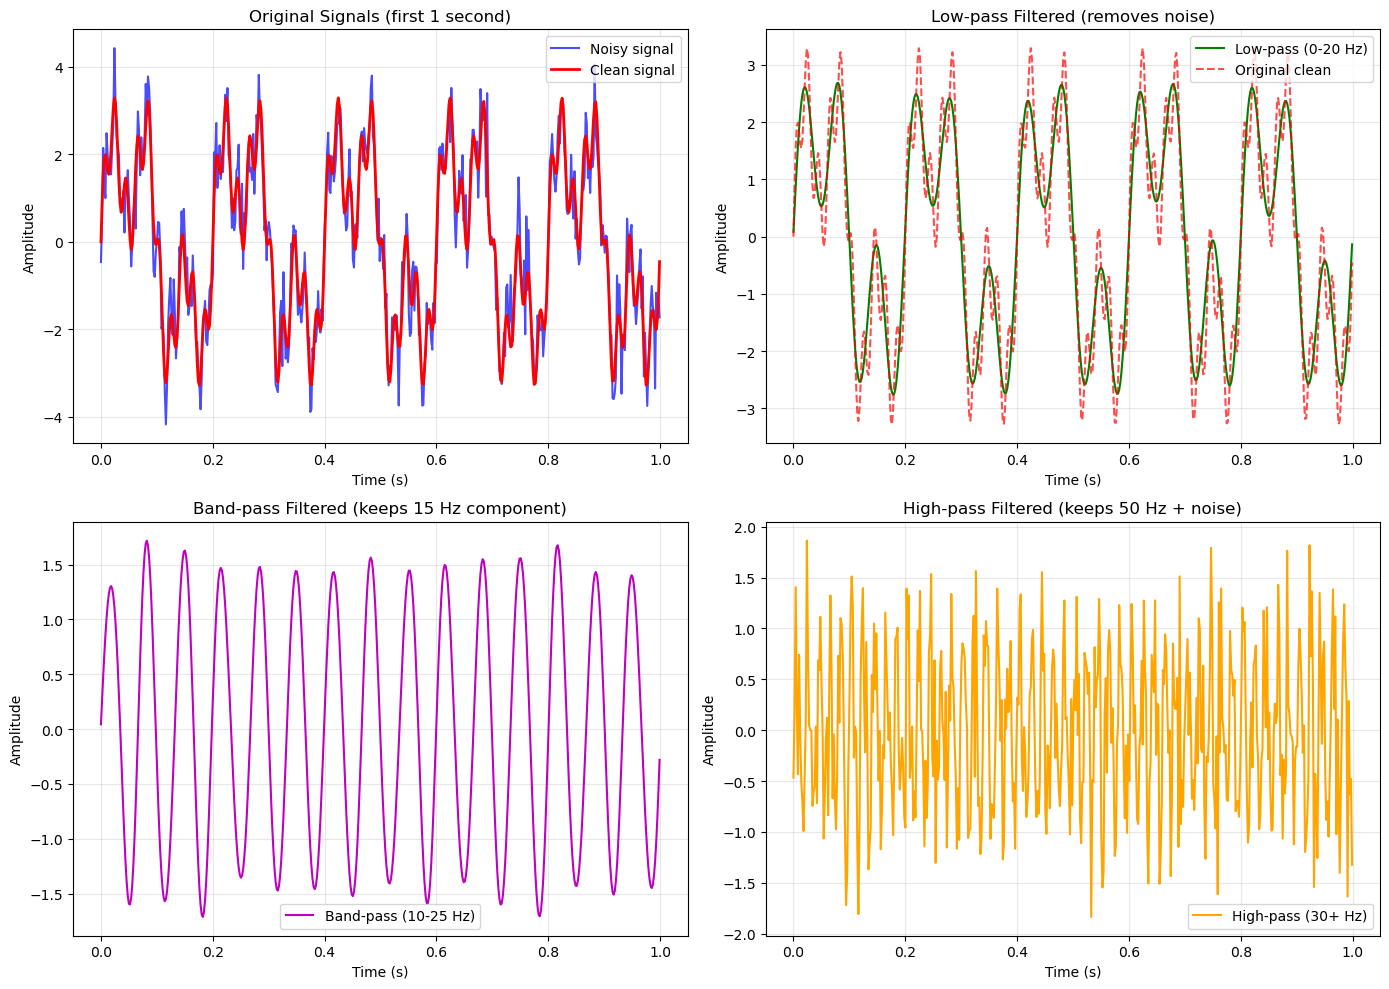

In [33]:
# Apply different frequency filters
low_pass_filtered = frequency_filter(signal_noisy, 0, 20, sample_rate)      # Keep 0-20 Hz
band_pass_filtered = frequency_filter(signal_noisy, 10, 25, sample_rate)    # Keep 10-25 Hz
high_pass_filtered = frequency_filter(signal_noisy, 30, 250, sample_rate)   # Keep 30-250 Hz

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Time domain plots
axes[0, 0].plot(t[:500], signal_noisy[:500], 'b-', alpha=0.7, label='Noisy signal')
axes[0, 0].plot(t[:500], signal_clean[:500], 'r-', linewidth=2, label='Clean signal')
axes[0, 0].set_title('Original Signals (first 1 second)')
axes[0, 0].set_xlabel('Time (s)')
axes[0, 0].set_ylabel('Amplitude')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(t[:500], low_pass_filtered[:500], 'g-', linewidth=1.5, label='Low-pass (0-20 Hz)')
axes[0, 1].plot(t[:500], signal_clean[:500], 'r--', alpha=0.7, label='Original clean')
axes[0, 1].set_title('Low-pass Filtered (removes noise)')
axes[0, 1].set_xlabel('Time (s)')
axes[0, 1].set_ylabel('Amplitude')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(t[:500], band_pass_filtered[:500], 'm-', linewidth=1.5, label='Band-pass (10-25 Hz)')
axes[1, 0].set_title('Band-pass Filtered (keeps 15 Hz component)')
axes[1, 0].set_xlabel('Time (s)')
axes[1, 0].set_ylabel('Amplitude')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].plot(t[:500], high_pass_filtered[:500], 'orange', linewidth=1.5, label='High-pass (30+ Hz)')
axes[1, 1].set_title('High-pass Filtered (keeps 50 Hz + noise)')
axes[1, 1].set_xlabel('Time (s)')
axes[1, 1].set_ylabel('Amplitude')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Example 2: Applications in Signal Processing

Here's an example of how frequency filtering is used to clean up real-world signals:

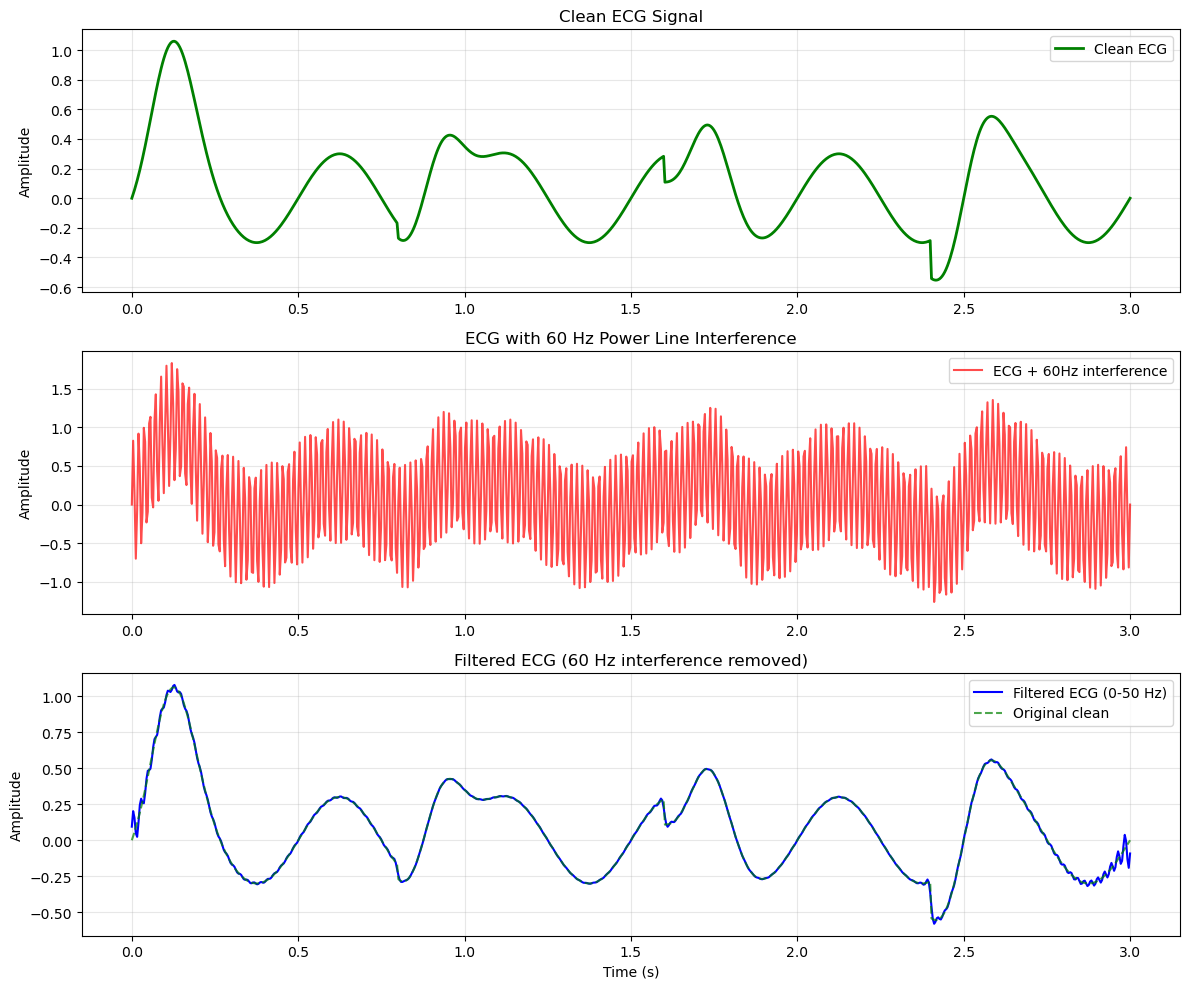

Signal Quality Analysis:
  SNR before filtering: -5.3 dB
  SNR after filtering:  25.6 dB
  Improvement: 30.8 dB


In [35]:
# Example: Simulating an ECG signal with power line interference
duration = 3.0
sample_rate = 250
t = np.linspace(0, duration, int(sample_rate * duration))

# Simulated ECG-like signal (simplified)
ecg_clean = (np.sin(2 * np.pi * 1.2 * t) * np.exp(-((t % 0.8) - 0.1)**2 / 0.01) + 
             0.3 * np.sin(2 * np.pi * 2 * t))

# Add 60 Hz power line interference (common in electrical recordings)
interference = 0.8 * np.sin(2 * np.pi * 60 * t)
ecg_noisy = ecg_clean + interference

# Apply filter to remove 60 Hz interference (notch filter effect)
ecg_filtered = frequency_filter(ecg_noisy, 0, 50, sample_rate)  # Keep 0-50 Hz

# Compare the signals
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

axes[0].plot(t, ecg_clean, 'g-', linewidth=2, label='Clean ECG')
axes[0].set_title('Clean ECG Signal')
axes[0].set_ylabel('Amplitude')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(t, ecg_noisy, 'r-', alpha=0.7, label='ECG + 60Hz interference')
axes[1].set_title('ECG with 60 Hz Power Line Interference')
axes[1].set_ylabel('Amplitude')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

axes[2].plot(t, ecg_filtered, 'b-', linewidth=1.5, label='Filtered ECG (0-50 Hz)')
axes[2].plot(t, ecg_clean, 'g--', alpha=0.7, label='Original clean')
axes[2].set_title('Filtered ECG (60 Hz interference removed)')
axes[2].set_xlabel('Time (s)')
axes[2].set_ylabel('Amplitude')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Calculate signal quality improvement
snr_before = 10 * np.log10(np.var(ecg_clean) / np.var(ecg_noisy - ecg_clean))
snr_after = 10 * np.log10(np.var(ecg_clean) / np.var(ecg_filtered - ecg_clean))

print(f"Signal Quality Analysis:")
print(f"  SNR before filtering: {snr_before:.1f} dB")
print(f"  SNR after filtering:  {snr_after:.1f} dB")
print(f"  Improvement: {snr_after - snr_before:.1f} dB")

## Required disclosure of use of AI technology

Please indicate whether you used AI to complete this homework. If you did, explain how you used it in the python cell below, as a comment.

In [ ]:
# BEGIN SOLUTION NO PROMPT
# END SOLUTION
""" # BEGIN PROMPT
"""
# write ai disclosure here:

"""
"""; # END PROMPT